<a href="https://colab.research.google.com/github/just3shot/Learning/blob/main/Aaron_Tan_Main_Project_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Celeba Dataset from Kaggle

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# Install Kaggle API
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# To prevent some error that pops up
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Where my resource come from
!kaggle datasets download -d jessicali9530/celeba-dataset

 99% 1.20G/1.21G [00:13<00:00, 119MB/s]
100% 1.21G/1.21G [00:13<00:00, 93.5MB/s]


## Importing Libaries for Data Visualisation

In [ ]:
import pandas as pd
import numpy as np
import cv2 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Exploration

In [ ]:
!ls

celeba-dataset.zip  kaggle.json  sample_data


In [ ]:
# Unzips the file so to obtain the csv file
!unzip -qq celeba-dataset.zip

In [ ]:
!ls

img_align_celeba      list_bbox_celeba.csv	       sample_data
kaggle.json	      list_eval_partition.csv
list_attr_celeba.csv  list_landmarks_align_celeba.csv


In [ ]:
# Unzips the file so to obtain the csv file
!unzip -qq img_align_celeba.zip

unzip:  cannot find or open img_align_celeba.zip, img_align_celeba.zip.zip or img_align_celeba.zip.ZIP.


In [ ]:
# Remove the zips once extracted
!rm celeba-dataset.zip
!rm img_align_celeba.zip

rm: cannot remove 'celeba-dataset.zip': No such file or directory
rm: cannot remove 'img_align_celeba.zip': No such file or directory


In [ ]:
!ls

img_align_celeba      list_bbox_celeba.csv	       sample_data
kaggle.json	      list_eval_partition.csv
list_attr_celeba.csv  list_landmarks_align_celeba.csv


In [ ]:
df = pd.read_csv("list_attr_celeba.csv")
df.head(5)

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [ ]:
df1 = df[["image_id", "Male"]]
df1.head(5)

,image_id,Male
0,000001.jpg,-1
1,000002.jpg,-1
2,000003.jpg,1
3,000004.jpg,-1
4,000005.jpg,-1


In [ ]:
# DataFrame.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad')
df1.replace(to_replace=-1, value=0, inplace=True)
df1.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,image_id,Male
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,1
3,000004.jpg,0
4,000005.jpg,0


In [ ]:
df_f = df1[df1["Male"] == 0].sample(n=5000, random_state=42)
df_m = df1[df1["Male"] == 1].sample(n=5000, random_state=42)

In [ ]:
data = pd.concat([df_f, df_m])
data = data.sort_index()
data.head(10)


,image_id,Male
81,000082.jpg,1
84,000085.jpg,0
107,000108.jpg,0
155,000156.jpg,0
200,000201.jpg,0
230,000231.jpg,0
231,000232.jpg,0
233,000234.jpg,1
241,000242.jpg,1
263,000264.jpg,1


In [ ]:
list01 = data["image_id"].values
print(type(list01))
list01[:10]

<class 'numpy.ndarray'>


array(['000082.jpg', '000085.jpg', '000108.jpg', '000156.jpg',
       '000201.jpg', '000231.jpg', '000232.jpg', '000234.jpg',
       '000242.jpg', '000264.jpg'], dtype=object)

## Picture data

In [ ]:
from glob import glob
import ntpath
import cv2
picture_file = glob("./img_align_celeba/*")

In [ ]:
image_id = []
for pic in picture_file:
  pic = pic[19:]
  image_id.append(pic)
image_id[:10]

['067689.jpg',
 '036317.jpg',
 '062526.jpg',
 '124000.jpg',
 '083720.jpg',
 '133217.jpg',
 '193706.jpg',
 '105815.jpg',
 '192240.jpg',
 '148840.jpg']

In [ ]:
wow = set(image_id).intersection(list01)
wow = sorted(wow)
print(wow)
print(len(wow))

['000082.jpg', '000085.jpg', '000108.jpg', '000156.jpg', '000201.jpg', '000231.jpg', '000232.jpg', '000234.jpg', '000242.jpg', '000264.jpg', '000286.jpg', '000295.jpg', '000297.jpg', '000334.jpg', '000335.jpg', '000346.jpg', '000357.jpg', '000360.jpg', '000406.jpg', '000489.jpg', '000494.jpg', '000511.jpg', '000520.jpg', '000527.jpg', '000539.jpg', '000610.jpg', '000617.jpg', '000637.jpg', '000643.jpg', '000669.jpg', '000712.jpg', '000716.jpg', '000718.jpg', '000732.jpg', '000741.jpg', '000788.jpg', '000798.jpg', '000812.jpg', '000813.jpg', '000828.jpg', '000858.jpg', '000875.jpg', '000879.jpg', '000891.jpg', '000952.jpg', '000961.jpg', '000972.jpg', '000978.jpg', '001005.jpg', '001034.jpg', '001036.jpg', '001073.jpg', '001079.jpg', '001118.jpg', '001125.jpg', '001136.jpg', '001141.jpg', '001143.jpg', '001156.jpg', '001173.jpg', '001215.jpg', '001238.jpg', '001325.jpg', '001367.jpg', '001370.jpg', '001392.jpg', '001398.jpg', '001422.jpg', '001436.jpg', '001464.jpg', '001476.jpg', '0014

In [ ]:
photo = cv2.imread(f"./img_align_celeba/000232.jpg", 0)
print(photo.shape)
photo = photo.flatten()
print(photo.shape)
print(photo)

(218, 178)
(38804,)
[83 83 84 ... 64 55 55]


In [ ]:
import cv2
x_data = np.array([])
for i, j in enumerate(wow):
  photo = cv2.imread(f"./img_align_celeba/{j}", 0)
  photo = photo.flatten()
  if len(x_data) == 0:
    x_data = photo
  else:
    x_data = np.vstack((x_data, photo))
x_data
# 100M 100F of 218x178 photos: (200*218) x 178

array([[ 59,  64,  64, ...,  76,  77,  77],
       [139, 139, 139, ...,  20,  34,  39],
       [ 73,  77,  74, ..., 214, 215, 217],
       ...,
       [  2,   2,   2, ...,  42,  56,  57],
       [255, 255, 255, ...,  41,  50,  52],
       [ 32,  29,  25, ...,  72,  72,  72]], dtype=uint8)

In [ ]:
y_labels = data["Male"]
y_labels.head(5)

81     1
84     0
107    0
155    0
200    0
Name: Male, dtype: int64

In [ ]:
x_data.shape, y_labels.shape

((10000, 38804), (10000,))

In [ ]:
# Shuffle
from sklearn.utils import shuffle
x_data, y_labels = shuffle(x_data, y_labels, random_state=42)

# Train Test Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_labels, test_size=0.1, random_state=42) # 10% of the data is used to test

x_train.shape, y_train.shape

((9000, 38804), (9000,))

In [ ]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], 218, 178, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 218, 178, 1).astype('float32')

x_train /= 255.0 # To make the values between 0 and 1
x_test /= 255.0

print(x_train.shape)
x_train.ndim

(9000, 218, 178, 1)


4

In [ ]:
type(y_train)
y_train.head(10)

66151     0
149965    1
120936    0
195818    1
230       0
43399     0
183316    0
17463     0
194597    0
23003     1
Name: Male, dtype: int64

In [ ]:

y_train = tf.keras.utils.to_categorical(y_train, 2) # 1 hot encoding
y_test = tf.keras.utils.to_categorical(y_test, 2)

In [ ]:
y_train.shape, y_test.shape

((9000, 2), (1000, 2))

In [ ]:
# Data Pipeline

import keras
import tensorflow as tf
from keras.models import Model, Sequential
from keras.applications.mobilenet import MobileNet
from keras.layers import *
from keras.optimizers import Adam, SGD

In [ ]:
# Setting up our Network Hyper Parameters

learning_rate = 0.001 
training_epochs = 10
batch_size = 128
num_classes = 20

In [ ]:
input_shape = (218,178,1)
num_classes = 2

# Model
Inp=Input(shape=input_shape)
x = Conv2D(32, kernel_size=(3, 3), activation='relu',name = 'Conv_01')(Inp)
x = MaxPooling2D(pool_size=(2, 2),name = 'MaxPool_01')(x)
x = Conv2D(64, (3, 3), activation='relu',name = 'Conv_02')(x)
x = MaxPooling2D(pool_size=(2, 2),name = 'MaxPool_02')(x)
x = Conv2D(64, (3, 3), activation='relu',name = 'Conv_03')(x)
x = Flatten(name = 'Flatten_01')(x)
x = Dense(64, activation='relu',name = 'Dense_01')(x)
x = Dropout(0.5,name = 'Dropout_02')(x)
output = Dense(num_classes, activation='softmax',name = 'Dense_02')(x)

In [ ]:
model = Model(Inp,output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 218, 178, 1)       0         
_________________________________________________________________
Conv_01 (Conv2D)             (None, 216, 176, 32)      320       
_________________________________________________________________
MaxPool_01 (MaxPooling2D)    (None, 108, 88, 32)       0         
_________________________________________________________________
Conv_02 (Conv2D)             (None, 106, 86, 64)       18496     
_________________________________________________________________
MaxPool_02 (MaxPooling2D)    (None, 53, 43, 64)        0         
_________________________________________________________________
Conv_03 (Conv2D)             (None, 51, 41, 64)        36928     
_________________________________________________________________
Flatten_01 (Flatten)         (None, 133824)            0         
__________

In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer= Adam(),
              metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          callbacks = None,
          validation_data=(x_test, y_test))

Train on 9000 samples, validate on 1000 samples
Epoch 1/10
9000/9000 [==============================] - 20s 2ms/step - loss: 0.6556 - acc: 0.6808 - val_loss: 0.3618 - val_acc: 0.8490
Epoch 2/10
9000/9000 [==============================] - 18s 2ms/step - loss: 0.3244 - acc: 0.8661 - val_loss: 0.2476 - val_acc: 0.8890
Epoch 3/10
9000/9000 [==============================] - 18s 2ms/step - loss: 0.2313 - acc: 0.9097 - val_loss: 0.2026 - val_acc: 0.9210
Epoch 4/10
9000/9000 [==============================] - 18s 2ms/step - loss: 0.1779 - acc: 0.9294 - val_loss: 0.1833 - val_acc: 0.9230
Epoch 5/10
9000/9000 [==============================] - 18s 2ms/step - loss: 0.1448 - acc: 0.9427 - val_loss: 0.1915 - val_acc: 0.9170
Epoch 6/10
9000/9000 [==============================] - 18s 2ms/step - loss: 0.1014 - acc: 0.9610 - val_loss: 0.1951 - val_acc: 0.9340
Epoch 7/10
9000/9000 [==============================] - 18s 2ms/step - loss: 0.0864 - acc: 0.9686 - val_loss: 0.1994 - val_acc: 0.9300
Epoch 8

In [ ]:
def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)

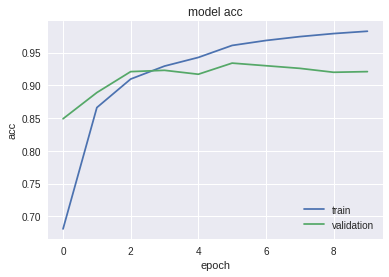

In [ ]:
plot_train(hist)

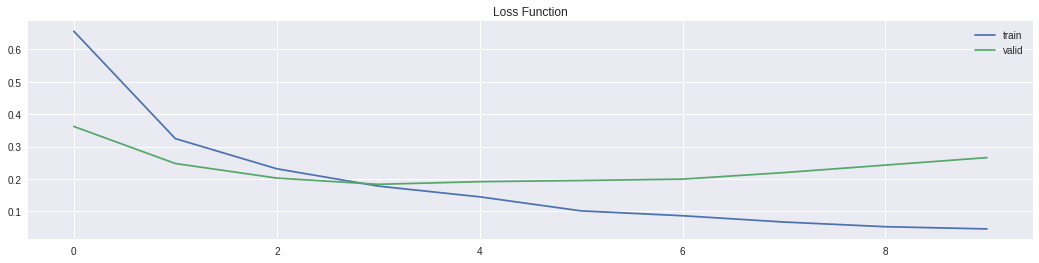

In [ ]:
# Plot loss function value through epochs
plt.figure(figsize=(18, 4))
plt.plot(hist.history['loss'], label = 'train')
plt.plot(hist.history['val_loss'], label = 'valid')
plt.legend()
plt.title('Loss Function')
plt.show()

In [ ]:
# Overfitting seems to be occuring. Wanted to use more samples but takes too long to process
model.evaluate(x_test,y_test)

1000/1000 [==============================] - 1s 1ms/step


[0.26574166750907896, 0.921]

0.921 Test Accuracy